Decision Tree

Tiatnic Survival Dataset


In [4]:
#Import the Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Load the Data
df=pd.read_csv("train_titanic.csv")
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
print(df.shape)
print(df.columns)

(891, 12)
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [6]:
#Load the data sets- train and test
target=df["Survived"]
x=df.drop(["Survived"],axis=1)
y=target



In [7]:
#Look at top values of train data
print(x.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S  


In [8]:
#Print the column names of train data
print(x.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [9]:
#Print the dimension of train and test data
print(x.shape)
print(y.shape)

(891, 11)
(891,)


In [10]:
#Print the number of missing values in each column of train and test data
print(x.isnull().sum())
print(y.isnull().sum())



PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
0


## Data Visualization


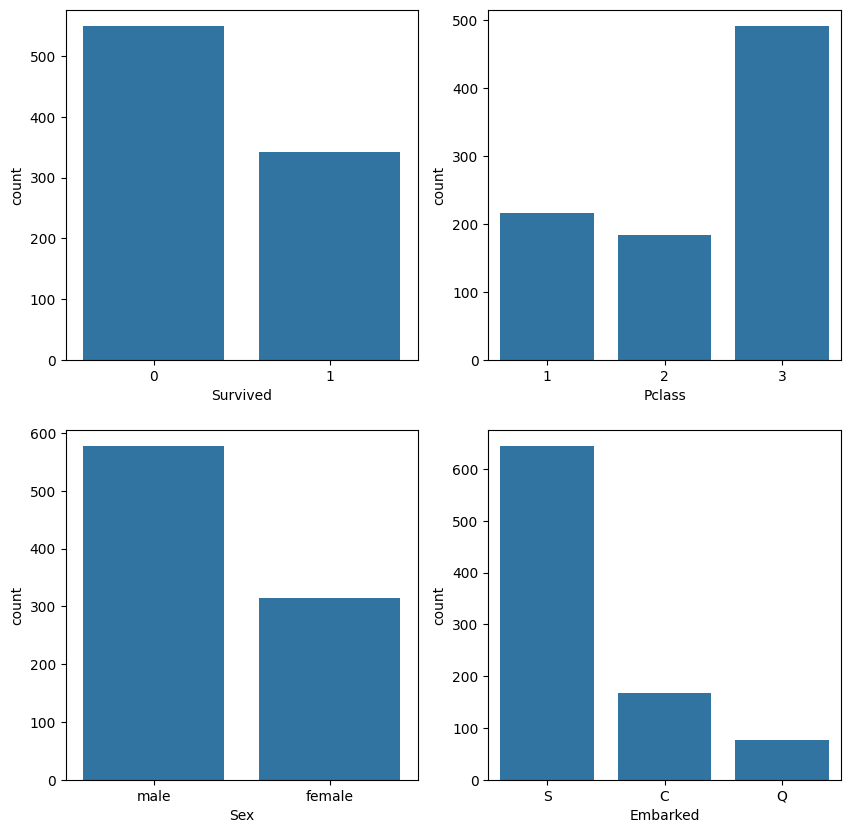

In [11]:
#Barchart of Survived, Pclass, Sex, Embarked
# all combined in one
fig,ax=plt.subplots(2,2,figsize=(10,10))
sns.countplot(x="Survived",data=df,ax=ax[0,0])
sns.countplot(x="Pclass",data=df,ax=ax[0,1])
sns.countplot(x="Sex",data=df,ax=ax[1,0])
sns.countplot(x="Embarked",data=df,ax=ax[1,1])
plt.show()





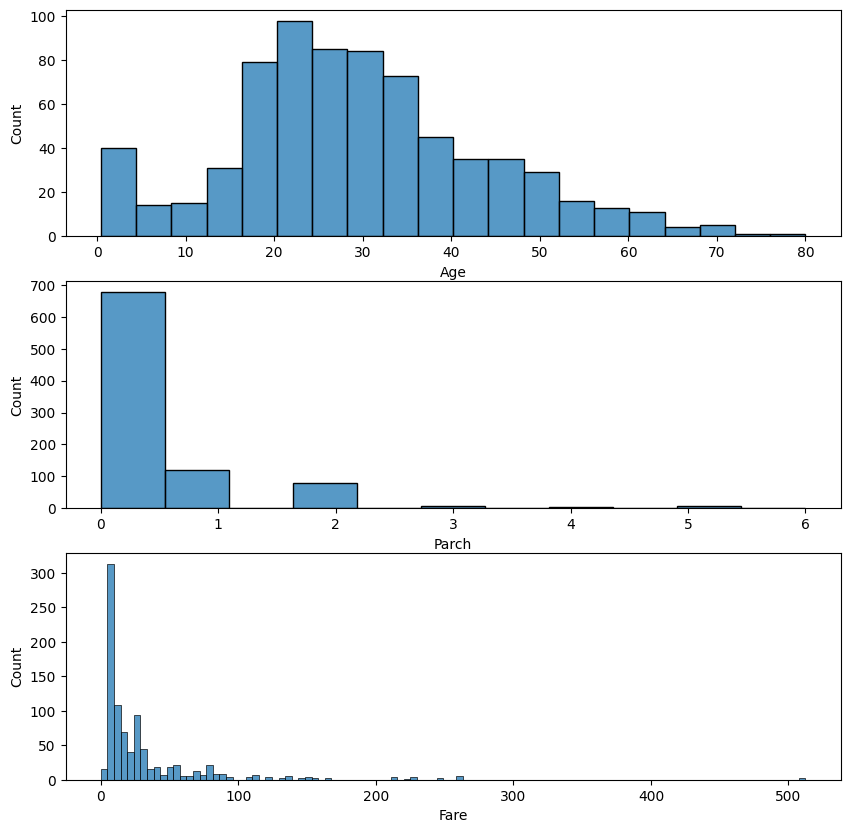

In [12]:
#Histogram of Age, Parch, Fare
fig,ax=plt.subplots(3,1,figsize=(10,10))
sns.histplot(df["Age"],ax=ax[0])
sns.histplot(df["Parch"],ax=ax[1])
sns.histplot(df["Fare"],ax=ax[2])
plt.show()

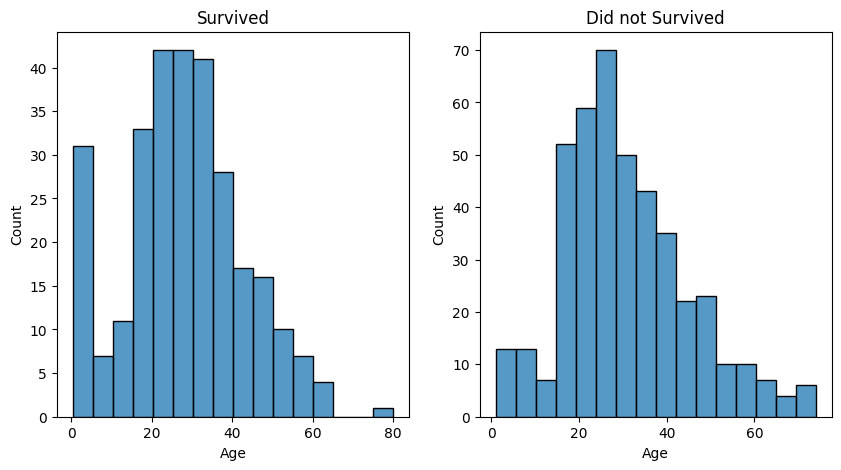

In [13]:
#Plot histogram of age for survived and did not survived class
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[df["Survived"]==1]["Age"],ax=ax[0])
ax[0].set_title("Survived")
sns.histplot(df[df["Survived"]==0]["Age"],ax=ax[1])
ax[1].set_title("Did not Survived")
plt.show()



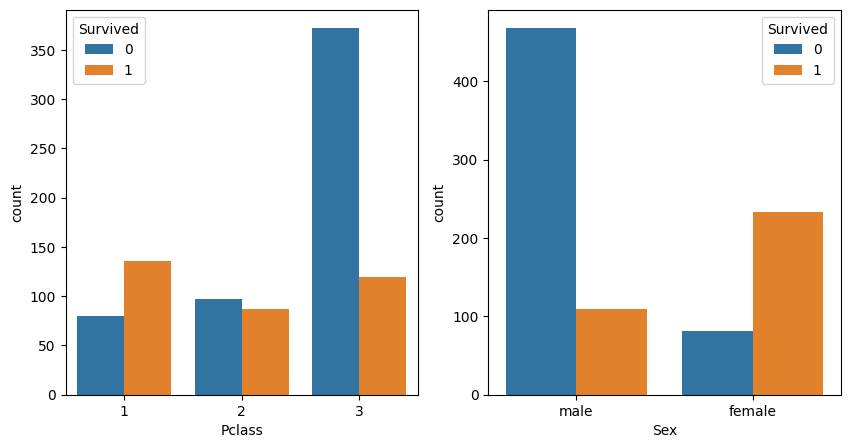

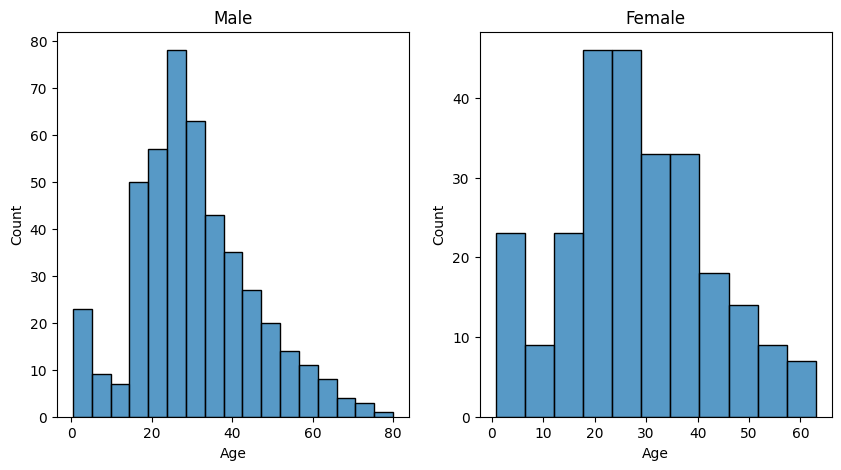

In [14]:
#Count class and gender wise survival rate - plot with appropriate chart
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(x="Pclass",hue="Survived",data=df,ax=ax[0])
sns.countplot(x="Sex",hue="Survived",data=df,ax=ax[1])
plt.show()
#Age wise Distribution of Male and Female passengers
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(df[df["Sex"]=="male"]["Age"],ax=ax[0])
ax[0].set_title("Male")
sns.histplot(df[df["Sex"]=="female"]["Age"],ax=ax[1])
ax[1].set_title("Female")
plt.show()

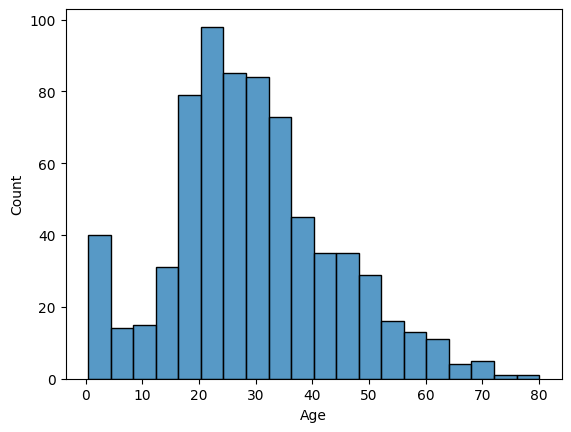

In [15]:
#Histogram of Age of the given data set(sample)
sns.histplot(df["Age"])
plt.show()

## Handling Missing Values


In [16]:
#Replace the msiing values in Embarked column by 'S'
df["Embarked"].fillna("S",inplace=True)
print(df.isnull().sum())



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [17]:
#Impute the missing values in Fare column with median value
df["Fare"].fillna(df["Fare"].median(),inplace=True)
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [18]:
#Impute the Age column. It has too many missing values but it may be important.
#We fill the missing values with numbers randomly drawn from distribution
#that has same mean and standard deviation as non missing Age data
mean=df["Age"].mean()
print(mean)
std=df["Age"].std()
is_null=df["Age"].isnull().sum()
rand_age=np.random.randint(mean-std,mean+std,size=is_null)
age_slice=df["Age"].copy()
age_slice[np.isnan(age_slice)]=rand_age
df["Age"]=age_slice
print(df.isnull().sum())

29.69911764705882
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [19]:
total_mean=df['Age'].mean()
print(total_mean)

29.474938271604938


## Feature Engineering - Creating new features


In [20]:
# Create and add a new feature FamilySize as a combination of SibSp and Parch
#FamilySize = Parch + SibSp + 1
df["FamilySize"]=df["Parch"]+df["SibSp"]+1
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  
0      0         A/5 21171   7.2500   NaN        S           2  
1      0          PC 17599  71.2833   C85        C           2  
2      0  STON/O2. 3101282   7.9250   NaN        S           1  
3      0            113803  53.1000  C123        S          

In [21]:
# Create new feature IsAlone from FamilySize
#If FamilySize == 1 then IsAlone = True else IsAlone = False
df["IsAlone"]=0
df.loc[df["FamilySize"]==1,"IsAlone"]=1
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  FamilySize  IsAlone  
0      0         A/5 21171   7.2500   NaN        S           2        0  
1      0          PC 17599  71.2833   C85        C           2        0  
2      0  STON/O2. 3101282   7.9250   NaN        S           1        1  
3      0            1138

## Create a new attribute Has_cabin using the attribue Cabin.

#if Cabin == NaN the Has_cabin = False else Has_cabin = True


In [22]:

#Drop the columns which may not be useful in prediction of survival
#Drop PassengerId, Name, Ticket, and Cabin
df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1,inplace=True)
print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  \
0         0       3    male  22.0      1      0   7.2500        S           2   
1         1       1  female  38.0      1      0  71.2833        C           2   
2         1       3  female  26.0      0      0   7.9250        S           1   
3         1       1  female  35.0      1      0  53.1000        S           2   
4         0       3    male  35.0      0      0   8.0500        S           1   

   IsAlone  
0        0  
1        0  
2        1  
3        0  
4        1  


## Model Building


In [23]:
#Prepare X and y
y=df["Survived"]
x=df.drop(["Survived"],axis=1)
print(x.head())
print(y.head())

   Pclass     Sex   Age  SibSp  Parch     Fare Embarked  FamilySize  IsAlone
0       3    male  22.0      1      0   7.2500        S           2        0
1       1  female  38.0      1      0  71.2833        C           2        0
2       3  female  26.0      0      0   7.9250        S           1        1
3       1  female  35.0      1      0  53.1000        S           2        0
4       3    male  35.0      0      0   8.0500        S           1        1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [28]:
# Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Sex"]=le.fit_transform(df["Sex"])
df["Embarked"]=le.fit_transform(df["Embarked"])
print(df.head())


KeyError: 'Embarked'

In [25]:
# concat df_categorical with original df
df=pd.concat([df,pd.get_dummies(df["Embarked"],prefix="Embarked")],axis=1)
df.drop(["Embarked"],axis=1,inplace=True)
print(df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3    1  22.0      1      0   7.2500           2        0   
1         1       1    0  38.0      1      0  71.2833           2        0   
2         1       3    0  26.0      0      0   7.9250           1        1   
3         1       1    0  35.0      1      0  53.1000           2        0   
4         0       3    1  35.0      0      0   8.0500           1        1   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  


In [26]:
# Embarked_0  Embarked_1  Embarked_2  
df["Embarked_0"]=df["Embarked_0"].astype(float)
df["Embarked_1"]=df["Embarked_1"].astype(float)
df["Embarked_2"]=df["Embarked_2"].astype(float)
print(df.head())

KeyError: 'Embarked_0'

In [29]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    encoder = LabelEncoder()
    x[col] = encoder.fit_transform(df[col])


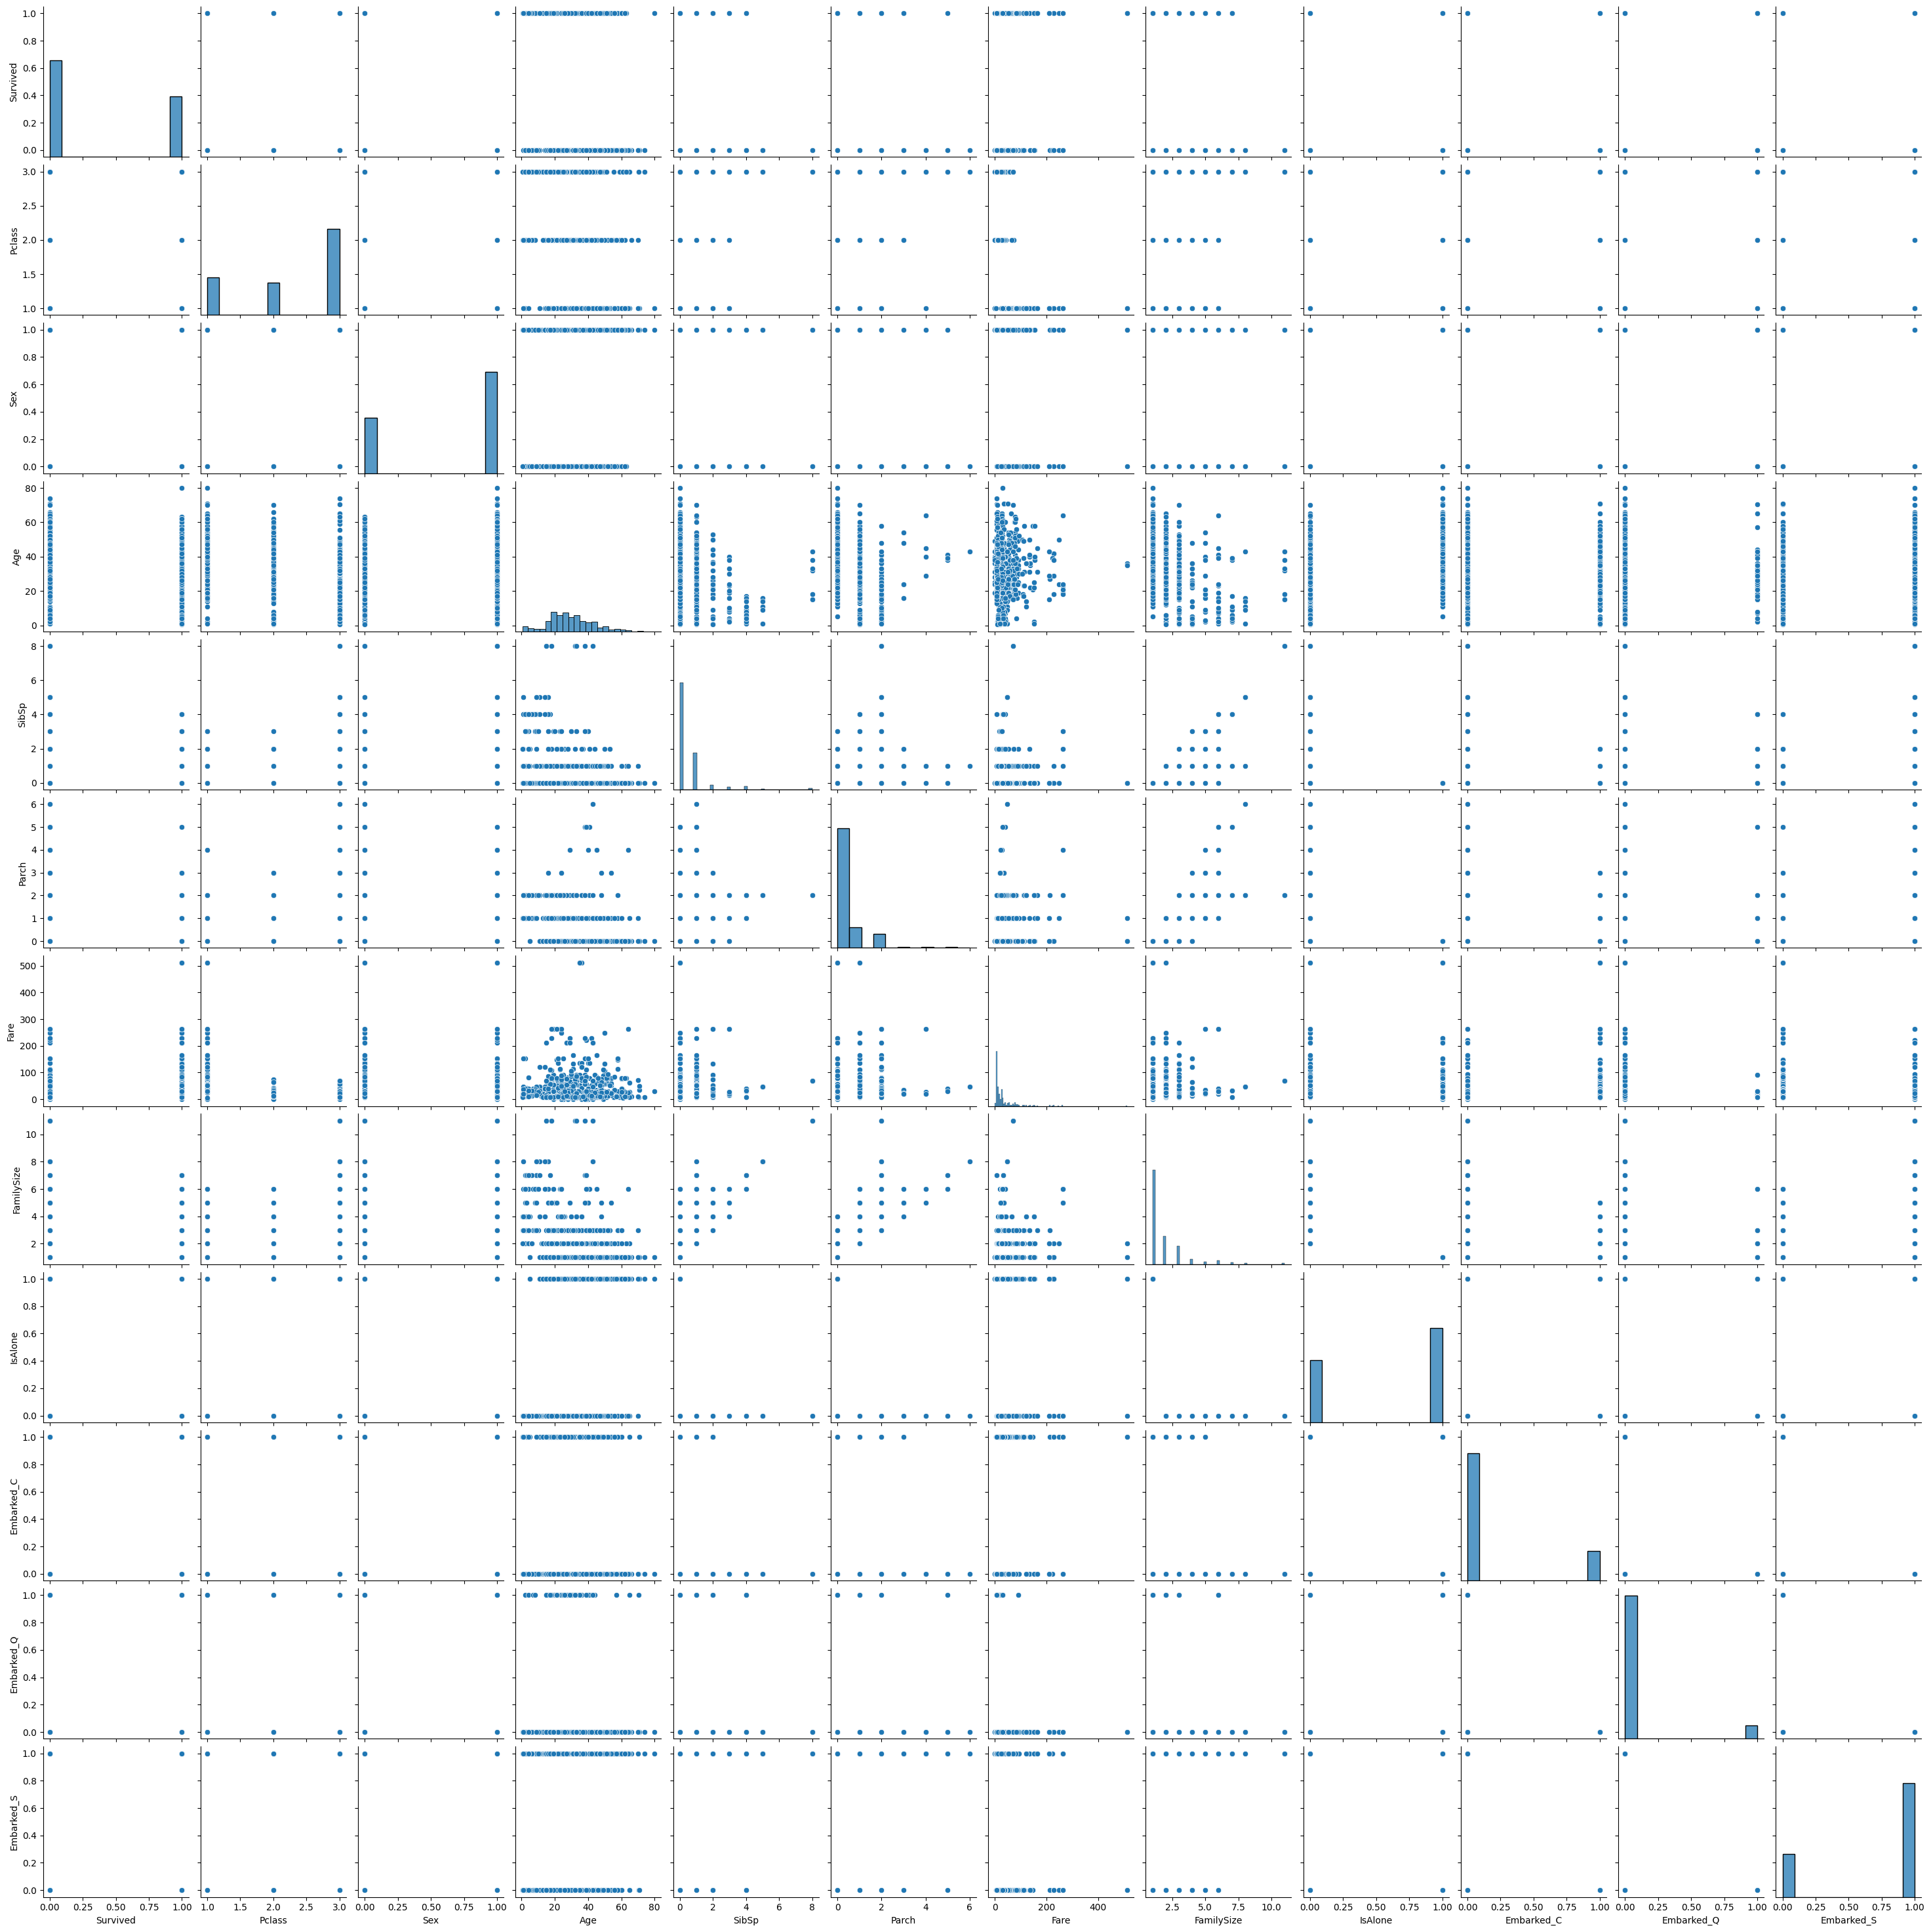

In [30]:
#Do a pairplot of all features
sns.pairplot(df)
plt.show()

In [57]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    encoder = LabelEncoder()
    x[col] = encoder.fit_transform(df[col])


In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,2,0,False,False,True
1,1,1,0,38.0,1,0,71.2833,2,0,True,False,False
2,1,3,0,26.0,0,0,7.9250,1,1,False,False,True
3,1,1,0,35.0,1,0,53.1000,2,0,False,False,True
4,0,3,1,35.0,0,0,8.0500,1,1,False,False,True


In [38]:
x=df.drop(columns='Survived',axis=1)
y=df['Survived']

In [ ]:
sns.pairplot(df)

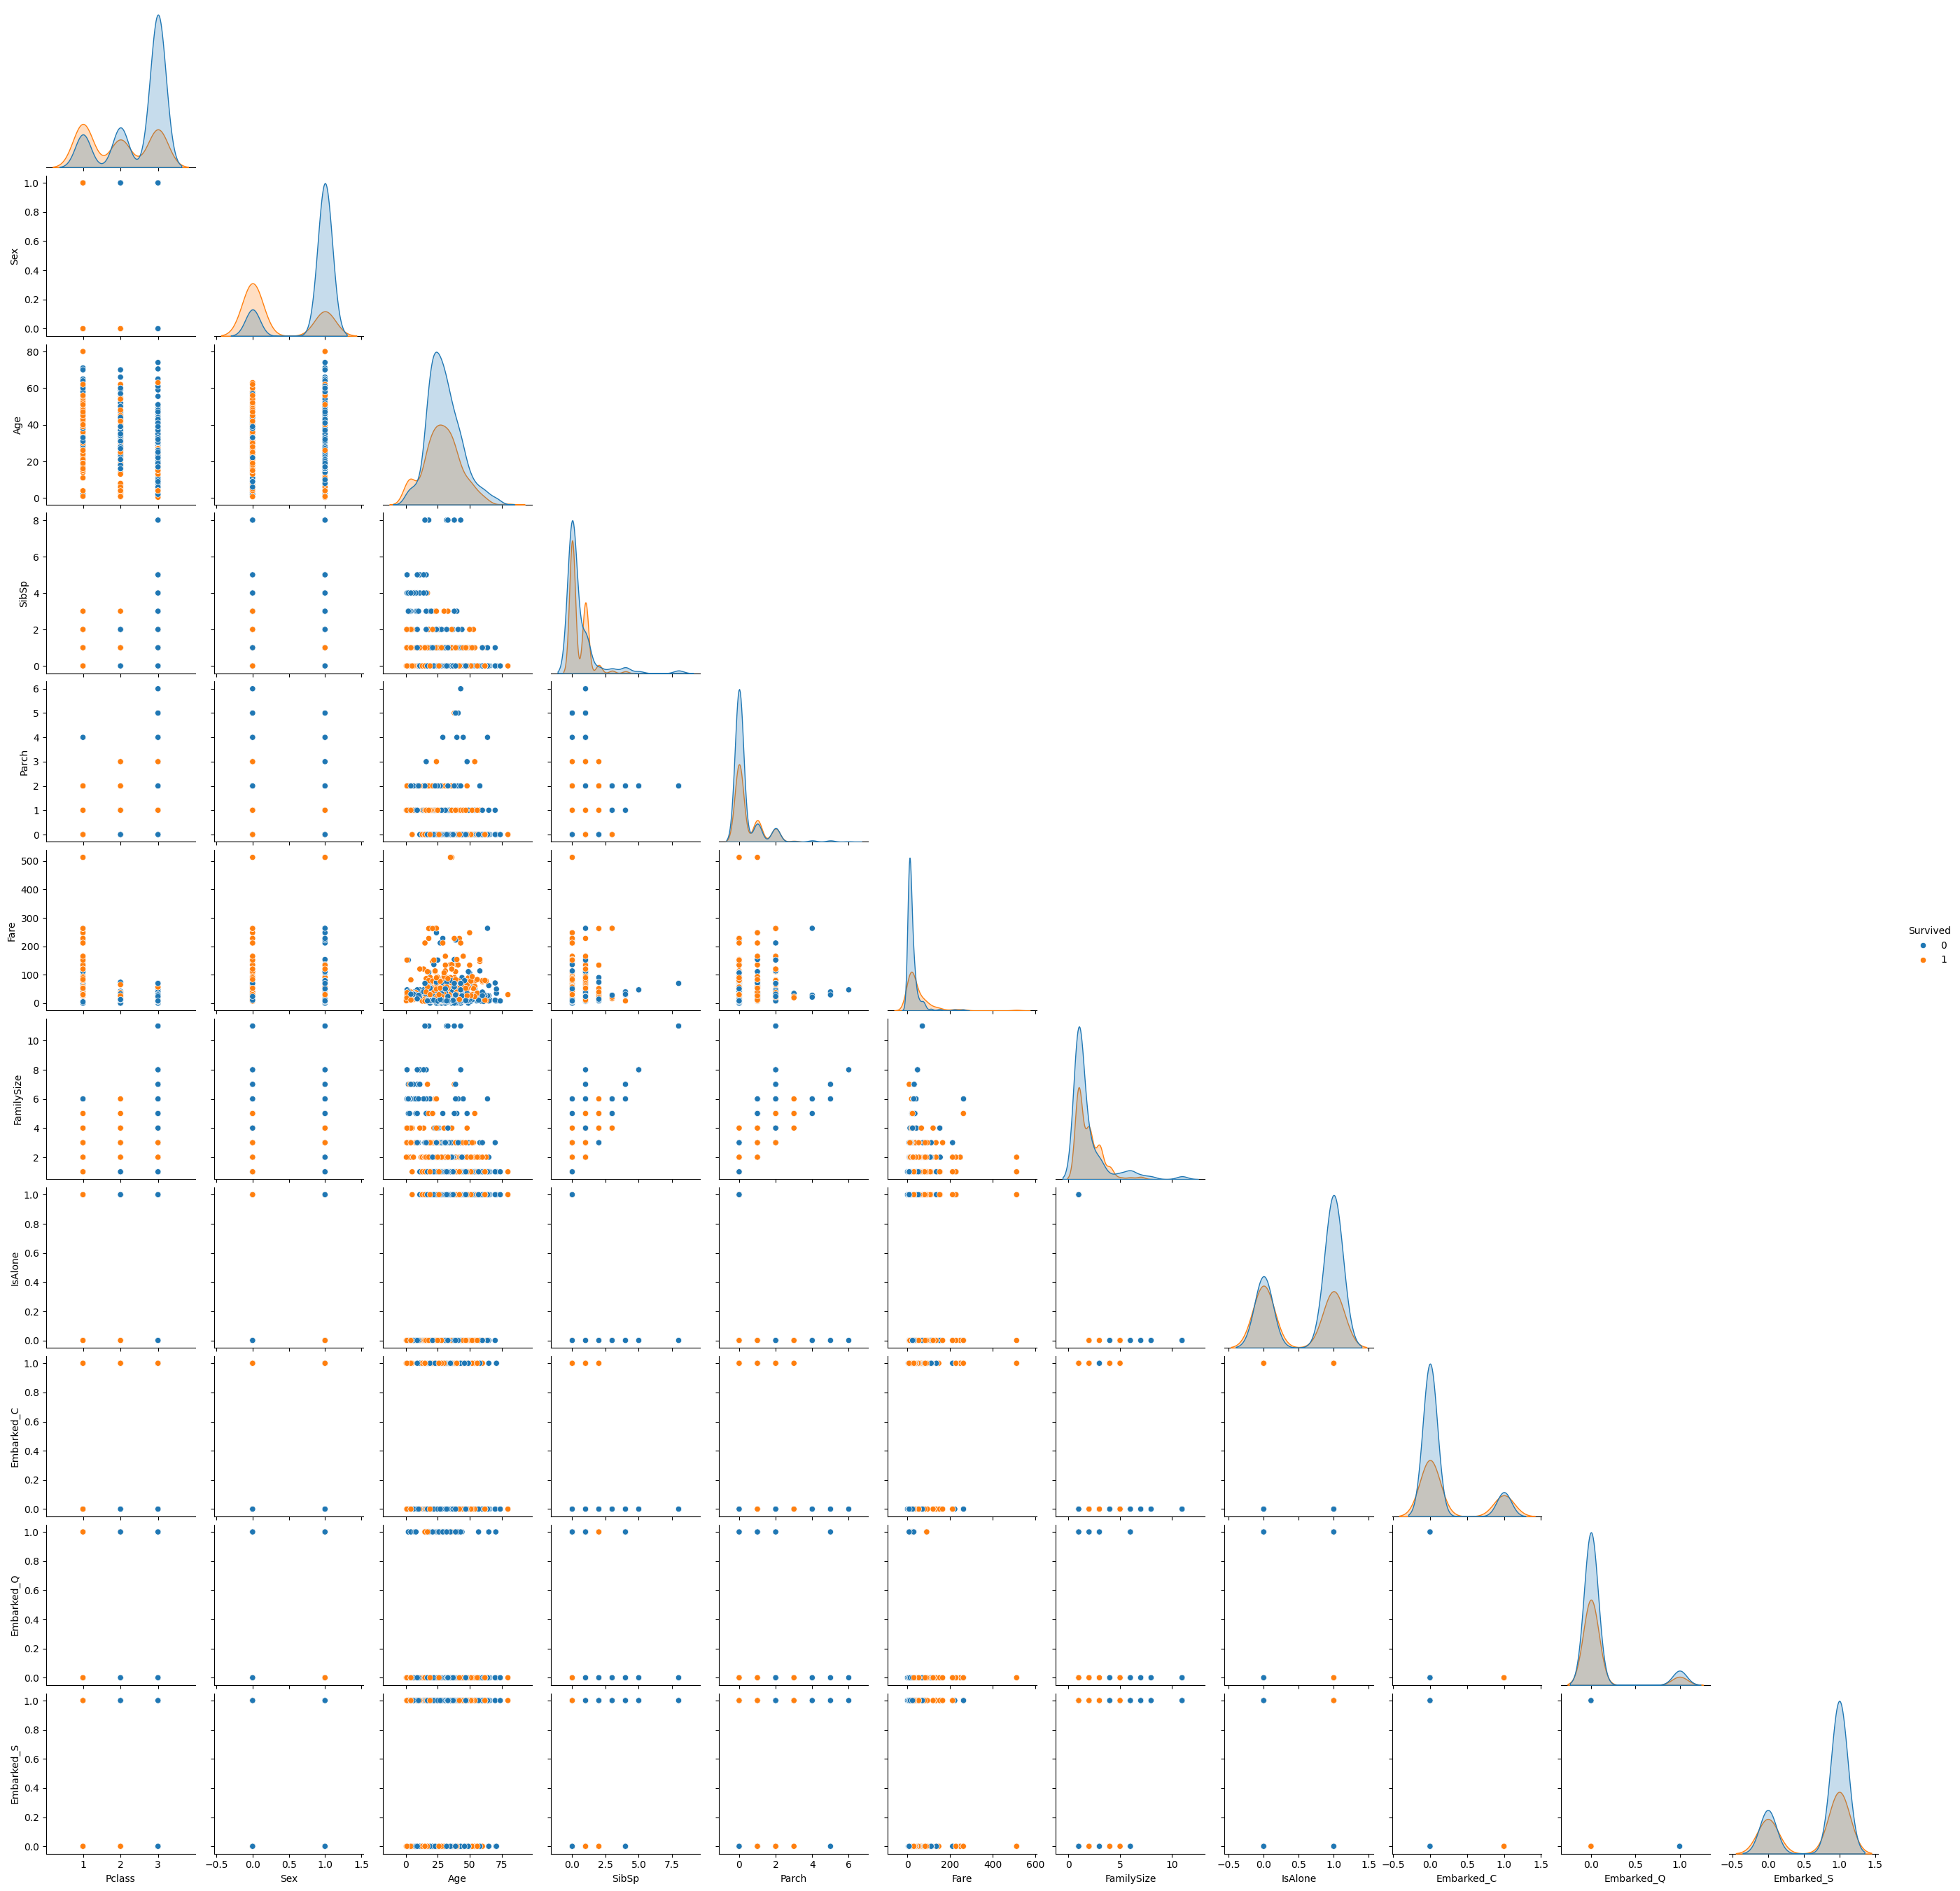

In [39]:
sns.pairplot(df,corner=True,hue="Survived")
plt.show()


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9,random_state=42)
print(x_train.shape)
print(x_test.shape)

(801, 11)
(90, 11)


In [41]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Embarked_C,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,2,0,False,False,True
1,1,0,38.0,1,0,71.2833,2,0,True,False,False
2,3,0,26.0,0,0,7.9250,1,1,False,False,True
3,1,0,35.0,1,0,53.1000,2,0,False,False,True
4,3,1,35.0,0,0,8.0500,1,1,False,False,True


In [42]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
y_predict=model.predict(x_test)

In [44]:
print(y_predict)

[1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0]


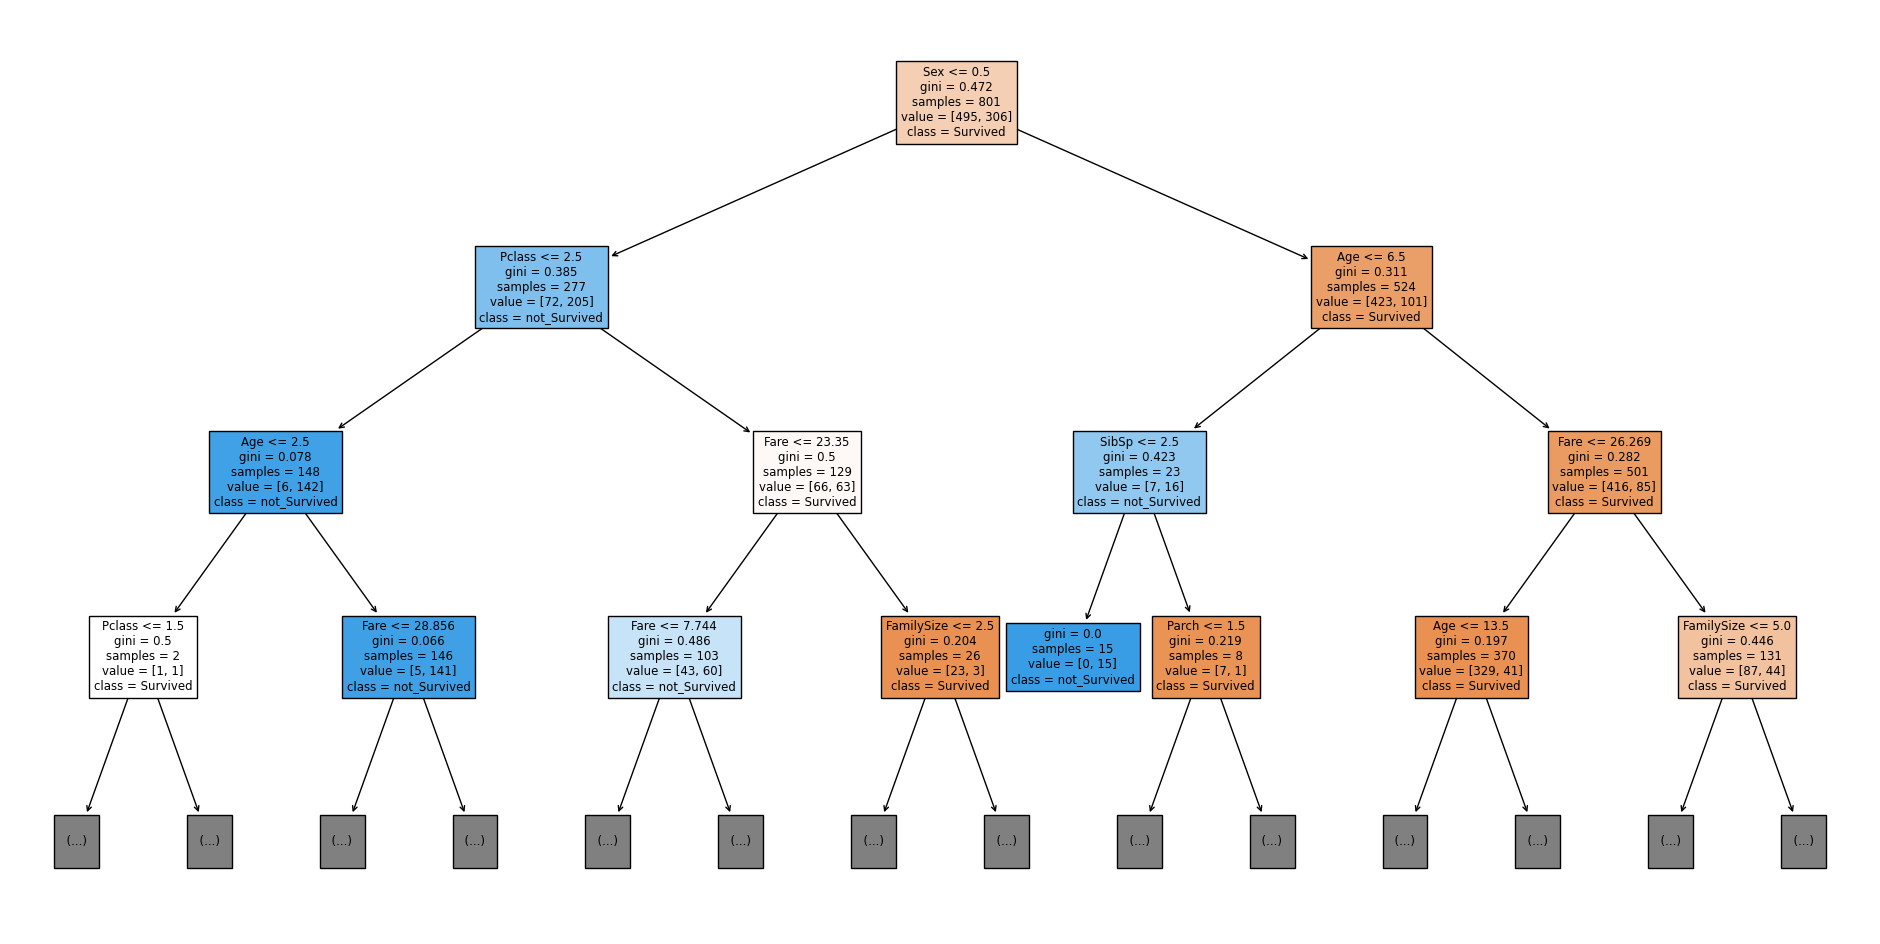

In [46]:
from sklearn.tree import plot_tree
plt.figure(figsize=(24,12))
plot_tree(model,feature_names=x.columns,class_names=['Survived','not_Survived'],filled=True,max_depth=3)
plt.show()

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("confusion_matrix:",confusion_matrix(y_test,y_predict))
print(f"\nAccuracy score : {accuracy_score(y_test,y_predict):.2f}")

confusion_matrix: [[39 15]
 [ 9 27]]

Accuracy score : 0.73


In [1]:
print(x)

NameError: name 'x' is not defined

In [58]:
# Splitting the data into train and validation set - 90% train 10% validation
#X_train, X_test, y_train, y_validation
from sklearn.model_selection import train_test_split
X_train,X_validation,y_train,y_validation=train_test_split(x,y,test_size=0.1,random_state=42)
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)


(801, 9)
(90, 9)
(801,)
(90,)


In [59]:
# Create the model
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
# Fitting the decision tree with default hyperparameters
model.fit(X_train,y_train)

# Importing decision tree classifier from sklearn library
# from sklearn.tree import DecisionTreeClassifier
# Creating the decision tree function
# dtree=DecisionTreeClassifier()




ValueError: could not convert string to float: 'male'

In [ ]:
#Print the tree

# Importing required packages for visualization


In [ ]:
plt.figure(figsize=(24,12))
plot_tree(model,feature_names=x.columns,class_names=["Not Survived", "Survived"],filled=True,max_depth=3)
plt.show()


In [ ]:
# plotting tree with max_depth=3

<img src="tree2.png">


In [ ]:
# Check the evaluation metrics of our default model on validation set - Confusion Matrix, Accuracy, Precision, Recall, F1 score

# Importing classification report and confusion matrix from sklearn metrics

# Making predictions

# Printing classification report

In [ ]:
# Printing confusion matrix and accuracy